In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import box, Polygon, LinearRing
import numpy as np
from scipy.spatial import ConvexHull
from shapely.affinity import scale, translate
import itertools

import matplotlib.pyplot as plt
import geopandas as gpd

from area_derivations import iou, minimum_bounding_rectangle, get_best_fit_rect

In [2]:
v1_ref = (60, 92)

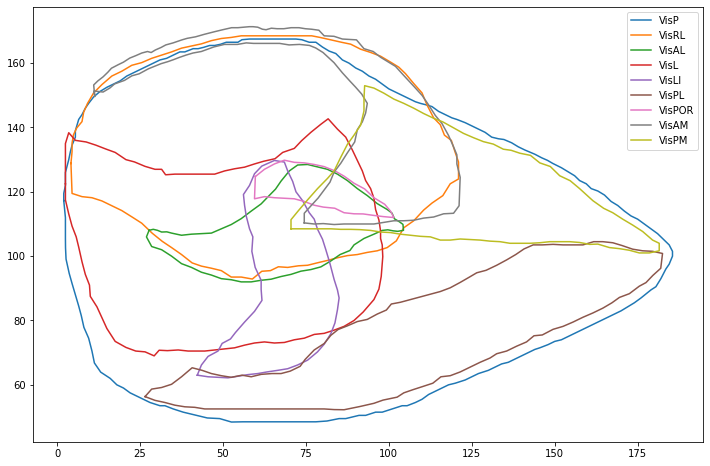

In [3]:
areas = ["VisP", "VisRL", "VisAL", "VisL", "VisLI", "VisPL", "VisPOR", "VisAM", "VisPM"]

plt.figure(figsize=(12, 8))

for area in areas:
    polygon = Polygon(pd.read_csv(f"digitized_data/{area}.csv").values)
    x, y = polygon.exterior.xy
    plt.plot(list(x), list(y), label=area)

plt.legend()

In [4]:
# area_pairs = list(itertools.product([areas[0]], areas[1:]))
# area_pairs

In [5]:
bounding_rectangles = []
visp_polygon = Polygon(pd.read_csv(f"digitized_data/VisP.csv").values)
visp_bound = Polygon(minimum_bounding_rectangle(visp_polygon))

for area in areas:
    polygon = Polygon(pd.read_csv(f"digitized_data/{area}.csv").values)
    min_bounding_rect = Polygon(minimum_bounding_rectangle(polygon))
    bounding_rectangles.append(
        visp_bound.intersection(min_bounding_rect)
    )
    

In [6]:
np.array(visp_polygon.exterior.xy).T.shape

(199, 2)

In [7]:
best_rects = []
#AM and PM don't work for some reason? Which is kind of convienent...
areas = ["VisP", "VisRL", "VisAL", "VisL", "VisLI", "VisPL", "VisPOR"]
for area in areas:
    best_rect, best_iou = get_best_fit_rect(area)
    best_rects.append((best_rect, best_iou))

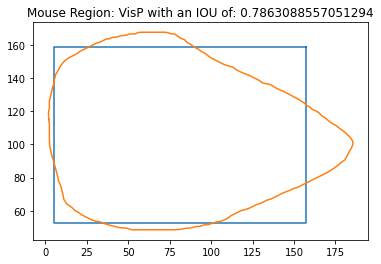

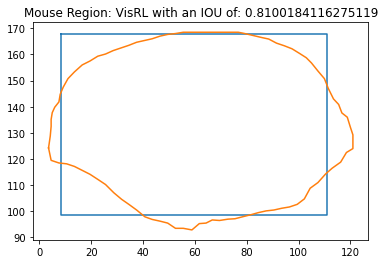

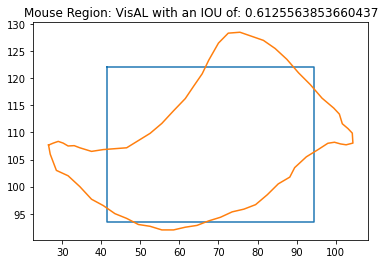

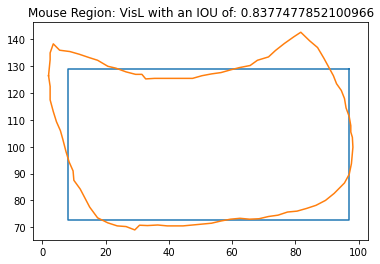

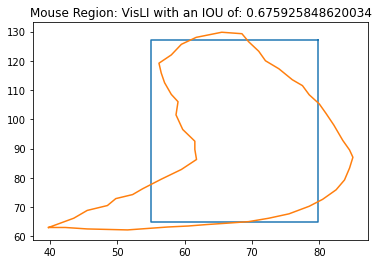

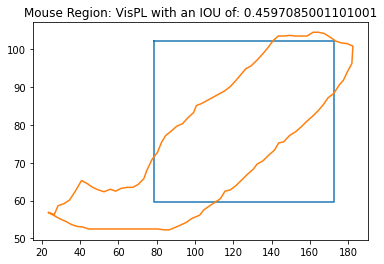

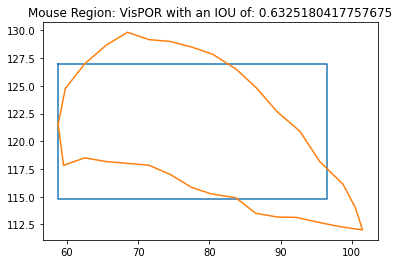

In [8]:
for i in range(len(areas)):
    plt.figure()
    area_df = pd.read_csv(f"digitized_data/{areas[i]}.csv", header=None)
    area_polygon = Polygon(area_df.values)

    best_rect, best_iou = best_rects[i]

    plt.plot(*best_rect.exterior.xy)
    plt.plot(*area_polygon.exterior.xy)

    plt.title(f"Mouse Region: {areas[i]} with an IOU of: {best_iou}")

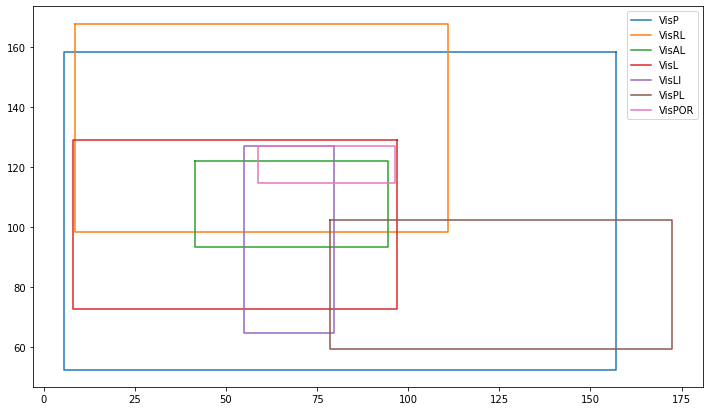

In [9]:
plt.figure(figsize=(12, 7))
for i in range(len(areas)):

    area_df = pd.read_csv(f"digitized_data/{areas[i]}.csv", header=None)
    area_polygon = Polygon(area_df.values)

    best_rect, best_iou = best_rects[i]

    plt.plot(*best_rect.exterior.xy, label=areas[i])

plt.legend()

In [14]:
visP_poly = best_rects[0][0]
x, y = visP_poly.exterior.xy
centroid = visP_poly.centroid

width = abs(list(x)[0] - list(x)[2])
height = abs(list(y)[0] - list(y)[1])

scaled_polys = []
for result in best_rects:
    poly = result[0]
    poly = scale(poly, xfact=92/width, yfact=60/height, origin=centroid)
    scaled_polys.append(
        poly
    )

visP_poly = scaled_polys[0]
x, y = visP_poly.exterior.xy
centroid = visP_poly.centroid

minX = min(list(x))
minY = min(list(y))

final_polys = []
for poly in scaled_polys:
    poly = translate(poly, xoff= -1*minX, yoff=-1*minY)
    final_polys.append(poly)

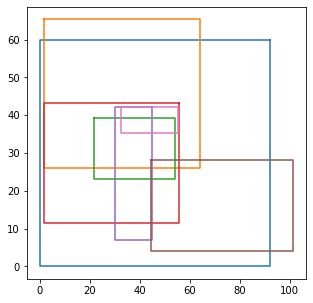

In [16]:
plt.figure(figsize=(5,5))
visp_final = 
for pp in final_polys:
    x, y = pp.exterior.xy
    x = list(x)
    y = list(y)
    plt.plot(x, y)

In [ ]:
saver = list(zip(final_result, final_polys))

In [ ]:
import pickle
pickle.dump(saver, open( "retinomap.pkl", "wb" ) )